## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

## Data Import

In [2]:
shopping_data = pd.read_csv('shopping_data.csv')

In [3]:
shopping_data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
shopping_data.shape

(200, 5)

In [5]:
data = shopping_data.iloc[:, 2:5].values
# data

## Run DandoGram Based Hirarchial Clustering

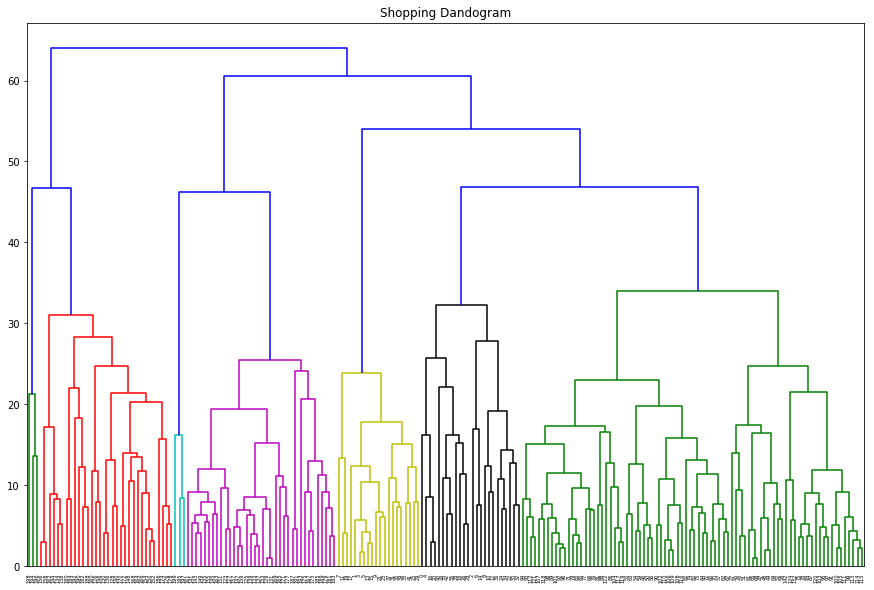

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15,10))
plt.title('Shopping Dandogram')
dend = shc.dendrogram(shc.linkage(data,method='average'))

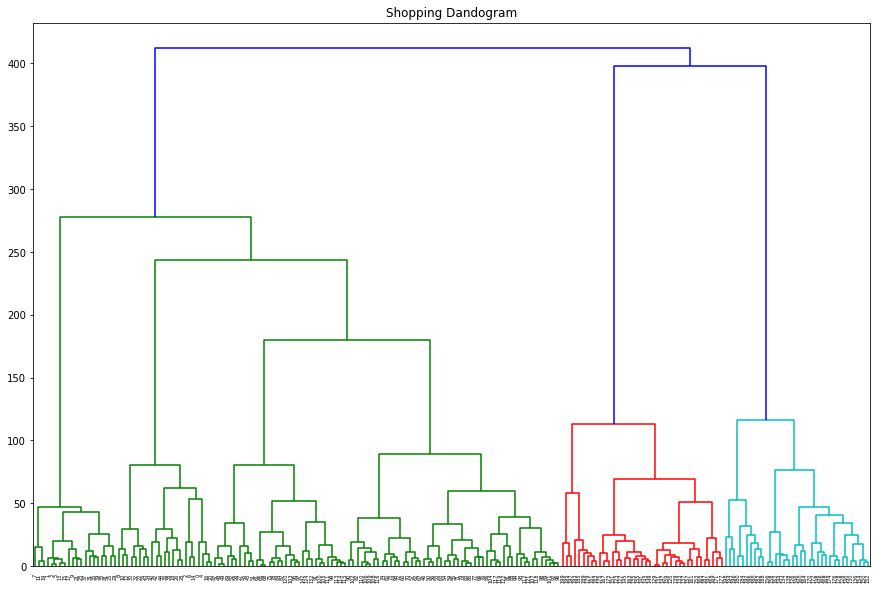

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15,10))
plt.title('Shopping Dandogram')
dend = shc.dendrogram(shc.linkage(data,method='ward'))

## Predict the Clusters for the observations

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster_a = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='average')
cluster_a.fit_predict(data)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 6, 5, 6,
       5, 6], dtype=int64)

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster_w = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
prediction = cluster_w.fit_predict(data)
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Plot the Cluster

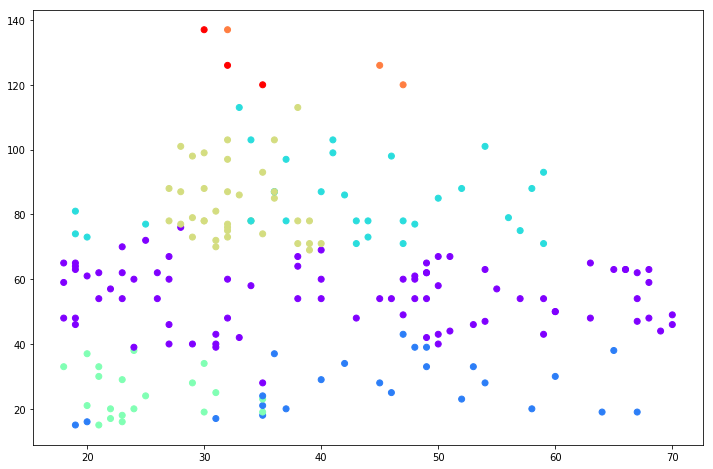

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], c=cluster_a.labels_, cmap= 'rainbow')

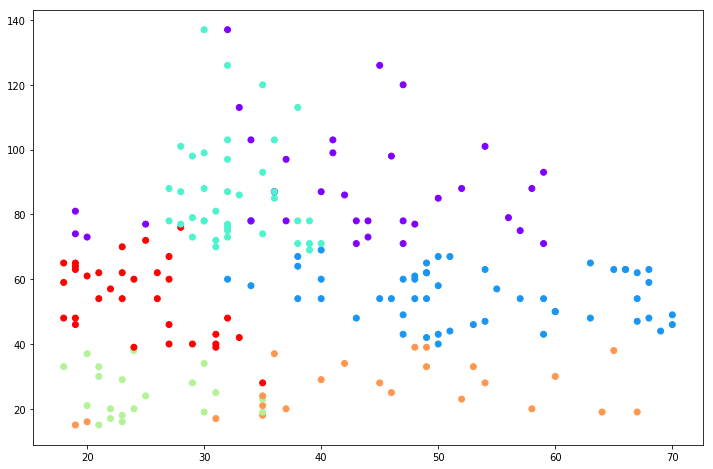

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], c=cluster_w.labels_, cmap= 'rainbow')

In [12]:
cluster_w

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [13]:
shopping_data['Predict_Cluster'] = prediction+1

In [14]:
shopping_data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predict_Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4


In [15]:
shopping_data.to_csv('shopping_data_cluster_predict.csv')